In [ ]:
import pandas as pd

df = pd.read_csv('/content/gurgaon_properties_cleaned_v1.csv')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall ...",NaN,"['Lift(s)', 'Park']"
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,Within 6 months,"['Sant Soordas Sihi Metro Station', 'Airia Mal...",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s..."
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road',...",[],"['Intercom Facility', 'Lift(s)', 'Park']"
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,not available,17.0,NaN,0 to 1 Year Old,"['Huda City Centre', 'Omaxe City Centre', 'Nin...",[],"['Feng Shui / Vaastu Compliant', 'Security / F..."
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,"servant room,others",10.0,North-West,1 to 5 Year Old,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-...","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Centrally Air Conditioned', 'Water purifier'..."


### working on area with type

In [ ]:
df['areaWithType'].value_counts()

,count
areaWithType,
Plot area 360(301.01 sq.m.),37
Plot area 300(250.84 sq.m.),26
Plot area 502(419.74 sq.m.),19
Plot area 200(167.23 sq.m.),19
Plot area 270(225.75 sq.m.),17
...,...
Super Built up area 1568(145.67 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.),1
Carpet area: 448 (41.62 sq.m.),1
Built Up area: 1800 (167.23 sq.m.)Carpet area: 900 sq.ft. (83.61 sq.m.),1


In [ ]:
import re

def extract_and_convert_area(area_str):
    if isinstance(area_str, str):
        # Pattern to extract the numerical value and unit specifically within parentheses
        match = re.search(r'([\d.]+)\s*\((sq\.?m\.|sq\.?ft\.)\)', area_str, re.IGNORECASE)
        if match:
            value = float(match.group(1))
            unit = match.group(2)

            # Convert to sqft if the unit is sq.m.
            if 'sq.m' in unit.lower():
                return value * 10.7639
            elif 'sq.ft' in unit.lower():
                return value
    return None

df['carpet_area_sqft'] = df['carpet_area_str'].apply(extract_and_convert_area)
df['built_up_area_sqft'] = df['built_up_area_str'].apply(extract_and_convert_area)
df['super_built_up_area_sqft'] = df['super_built_up_area_str'].apply(extract_and_convert_area)
df['plot_area_sqft'] = df['plot_area_str'].apply(extract_and_convert_area)

display(df[['areaWithType', 'carpet_area_sqft', 'built_up_area_sqft', 'super_built_up_area_sqft', 'plot_area_sqft']].head())

,areaWithType,carpet_area_sqft,built_up_area_sqft,super_built_up_area_sqft,plot_area_sqft
0,Super Built up area 1081(100.43 sq.m.)Carpet a...,650.0,1081.0,1081.0,NaN
1,Carpet area: 1103 (102.47 sq.m.),1103.0,NaN,NaN,NaN
2,Carpet area: 58141 (5401.48 sq.m.),58141.0,NaN,NaN,NaN
3,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,585.0,1000.0,NaN,NaN
4,Super Built up area 1995(185.34 sq.m.)Built Up...,1476.0,1995.0,1995.0,NaN


In [ ]:
df.drop(['carpet_area_str','built_up_area_str','super_built_up_area_str','plot_area_str'],axis = 1,inplace = True)

In [ ]:
def convert_scale(row):
    # Check if both 'area' and 'plot_area_sqft' are valid numbers before proceeding
    if pd.notna(row['area']) and pd.notna(row['plot_area_sqft']) and row['plot_area_sqft'] != 0:
        # Perform the calculation only if both are not NaN and plot_area_sqft is not zero
        ratio = round(row['area'] / row['plot_area_sqft'])
        if ratio == 9.0:
            return row['plot_area_sqft'] * 9.0
        elif ratio == 11.0:
            return row['plot_area_sqft'] * 10.7
        else:
            return row['plot_area_sqft']
df['plot_area_sqft'] = df.apply(convert_scale, axis=1)

In [ ]:
df[df['plot_area_sqft'].notna()][['area','plot_area_sqft']]

,area,plot_area_sqft
9,1185.51,1185.51
10,1350.00,1350.00
15,846.00,846.00
19,1440.00,1440.00
25,3240.00,3240.00
26,2475.00,2475.00
28,450.00,450.00
29,5400.00,5400.00
31,2880.00,2880.00
37,370.00,370.00


### working with additional rooms

in observation there are three types of rooms
1. servant room
2. pooja room
3. others
4. store room
5. study room

In [ ]:
def has_room(additional_room_str, room_type):
    if isinstance(additional_room_str, str):
        # Use case-insensitive search for the room type
        if room_type.lower() in additional_room_str.lower().strip():
            return 1
    return 0

df['servant room'] = df['additionalRoom'].apply(lambda x: has_room(x, 'servant room'))
df['pooja room'] = df['additionalRoom'].apply(lambda x: has_room(x, 'pooja room'))
df['others room'] = df['additionalRoom'].apply(lambda x: has_room(x, 'others')) # Using 'others room' for clarity
df['store room'] = df['additionalRoom'].apply(lambda x: has_room(x, 'store room'))
df['study room'] = df['additionalRoom'].apply(lambda x: has_room(x, 'study room'))

# Display the relevant columns to show the result
display(df[['additionalRoom', 'servant room', 'pooja room', 'others room', 'store room', 'study room']].head())

,additionalRoom,servant room,pooja room,others room,store room,study room
0,not available,0,0,0,0,0
1,"study room,servant room",1,0,0,0,1
2,not available,0,0,0,0,0
3,not available,0,0,0,0,0
4,"servant room,others",1,0,1,0,0


working on age possesion

In [ ]:
def convert_age(value):
  if pd.isna(value):
    return 'undefined'
  elif "0 to 1 Year Old" in value or "Within 6 months" or "Within 1 Year" in value:
    return "new value"
  elif "1 to 5 Year Old" in value:
    return "relatively old value"
  elif "5 to 10 Year Old" in value:
    return "moderately old value"
  elif "10+ Year Old" in value:
    return "very old value"
  elif "Under Construction" in value or 'By' in value:
    return "under construction"
  try:
    int(value.split(" ")[-1])
    return "under construction"
  except:
    return "undefined"


df['agePossession'] = df['agePossession'].apply(convert_age)

### working on furnished details

first one hot code them into all unique features and then make three groups on the basis of clusters


In [ ]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [ ]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

NameError: name 'furnishings_df' is not defined

In [ ]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

NameError: name 'scaled_data' is not defined

this picture tells you that it takes three categories of division


In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [ ]:
df = df.iloc[:,:-18]

In [ ]:
df['furnishing_type'] = cluster_assignments

5. features

#### in the appartment df we can find the location advantages of some missing properties


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/gurgaon_properties_cleaned_v1.csv')

In [4]:
app_df = pd.read_csv('appartments.csv')

In [5]:
app_df.head()

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Pa...","{'Bajghera Road': '800 Meter', 'Palam Vihar Ha...",https://www.99acres.com/smartworld-one-dxp-sec...,"{'2 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'Salon', 'Restaurant', 'Spa'..."
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap Un...","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The N...",https://www.99acres.com/m3m-crown-sector-111-g...,"{'3 BHK': {'building_type': 'Apartment', 'area...","['Bowling Alley', 'Mini Theatre', 'Manicured G..."
2,Adani Brahma Samsara Vilasa,"Land, 3, 4 BHK Independent Floor in Sector 63,...","['AIPL Business Club Sector 62', 'Heritage Xpe...","{'AIPL Business Club Sector 62': '2.7 Km', 'He...",https://www.99acres.com/adani-brahma-samsara-v...,{'3 BHK': {'building_type': 'Independent Floor...,"['Terrace Garden', 'Gazebo', 'Fountain', 'Amph..."
3,Sobha City,"2, 3, 4 BHK Apartment in Sector 108, Gurgaon","['The Shikshiyan School', 'WTC Plaza', 'Luxus ...","{'The Shikshiyan School': '2.9 KM', 'WTC Plaza...",https://www.99acres.com/sobha-city-sector-108-...,"{'2 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'Volley Ball Court', 'Aerobi..."
4,Signature Global City 93,"2, 3 BHK Independent Floor in Sector 93 Gurgaon","['Pranavananda Int. School', 'DLF Site central...","{'Pranavananda Int. School': '450 m', 'DLF Sit...",https://www.99acres.com/signature-global-city-...,{'2 BHK': {'building_type': 'Independent Floor...,"['Mini Theatre', 'Doctor on Call', 'Concierge ..."


In [6]:
app_df['PropertyName'] =app_df['PropertyName'].str.lower()

In [7]:
temp_df = df[df['features'].isnull()]

In [8]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,not available,2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall ...",NaN,"['Lift(s)', 'Park']"
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room",4.0,NaN,Within 6 months,"['Sant Soordas Sihi Metro Station', 'Airia Mal...",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s..."
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road',...",[],"['Intercom Facility', 'Lift(s)', 'Park']"
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,not available,17.0,NaN,0 to 1 Year Old,"['Huda City Centre', 'Omaxe City Centre', 'Nin...",[],"['Feng Shui / Vaastu Compliant', 'Security / F..."
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,"servant room,others",10.0,North-West,1 to 5 Year Old,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-...","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Centrally Air Conditioned', 'Water purifier'..."


In [12]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')[['features','TopFacilities']]

In [13]:
df.loc[temp_df.index,'features'] = x['TopFacilities']

on the basis of no of different types of features and how many items in that particular feature we can assign a luxary score

In [14]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [15]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [17]:
from sklearn.cluster import KMeans
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

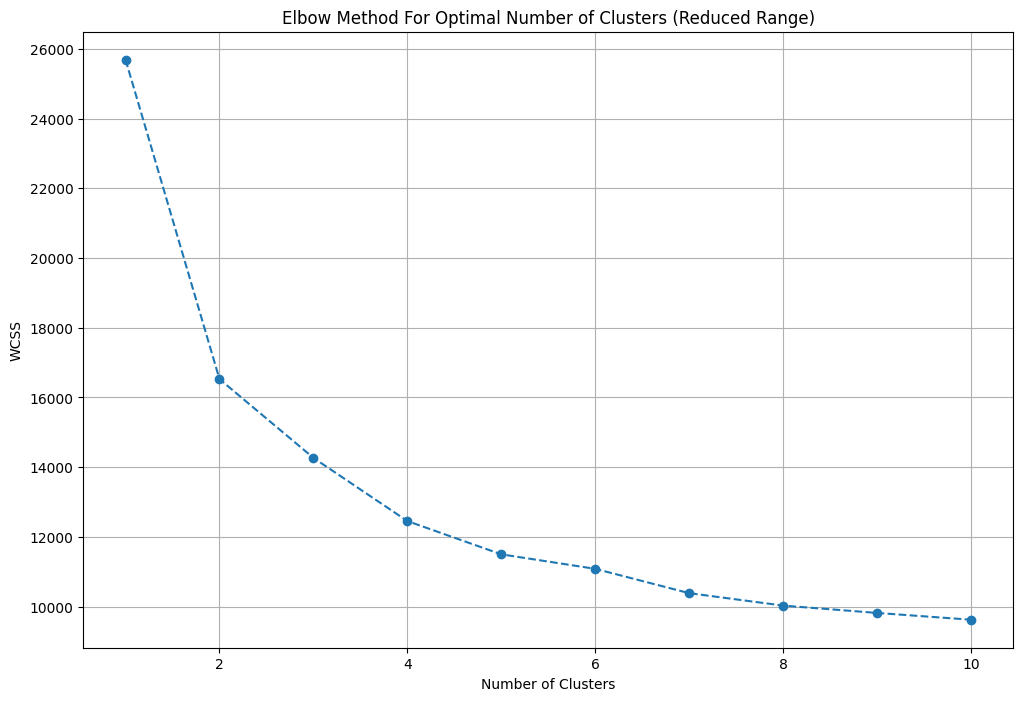

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

on the basis of graph for two clusters it will be better but then got the idea of luxary score so i asked chatgpt to give me the score for each item in the unique items of features

In [21]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Filter weights to include only features present in features_binary_df
present_features = [feature for feature in weights.keys() if feature in features_binary_df.columns]
filtered_weights = {feature: weights[feature] for feature in present_features}

# Calculate luxury score for each row using filtered weights
luxury_score = features_binary_df[present_features].multiply(list(filtered_weights.values())).sum(axis=1)

In [22]:
df['luxury_score'] = luxury_score

In [23]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [24]:
df.to_csv('/content/gurgaon_properties_cleaned_v2.csv')